In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import h5py
import seaborn
seaborn.set()

Positives: 23275
Positives: 22800
Positives: 23275
Positives: 22800


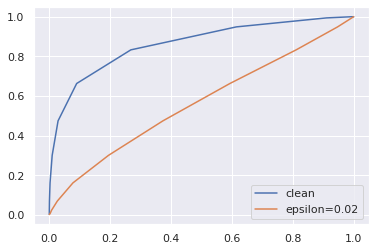

In [6]:
with h5py.File("../results/roc_curve_test_preprocessed_sampled.txt", 'r') as f:
    tprs = f['tprs'][:]
    fprs = f['fprs'][:]
    print("Positives:", len(f['positive']))
    print("Positives:", len(f['negative']))
    
plt.plot(fprs, tprs, label="clean")

with h5py.File("../results/roc_curve_test_preprocessed_sampled_community_naive_same_epsilon_0.02.txt", 'r') as f:
    tprs = f['tprs'][:]
    fprs = f['fprs'][:]
    print("Positives:", len(f['positive']))
    print("Positives:", len(f['negative']))
    
plt.plot(fprs, tprs, label="epsilon=0.02")
plt.legend()

Positives: 31925134
Positives: 31798999


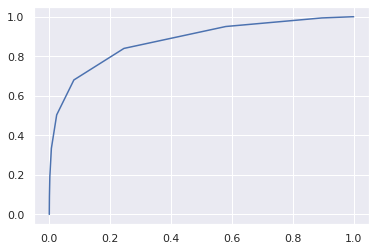

In [9]:
with h5py.File("../results/roc_curve_test_preprocessed.txt", 'r') as f:
    tprs = f['tprs'][:]
    fprs = f['fprs'][:]
    print("Positives:", len(f['positive']))
    print("Positives:", len(f['negative']))

plt.plot(fprs, tprs)